___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  # Lemmatize
from nltk.stem import PorterStemmer      # Stemming 
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)
plt.rcParams["figure.figsize"] = (10,6)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
df_ = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")

In [4]:
df = df_.copy()
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
df.shape

(23486, 11)

In [7]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
df["Recommended IND"] = df["Recommended IND"].map({1:0, 0:1})

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [9]:
df['Recommended IND'].value_counts()

0    19314
1     4172
Name: Recommended IND, dtype: int64

In [10]:
df['Recommended IND'].value_counts(normalize=True)

0    0.822362
1    0.177638
Name: Recommended IND, dtype: float64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [11]:
df = df[["Review Text","Recommended IND"]]
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0


In [12]:
df.columns = [i.lower().split()[0]+ "_" + i.lower().split()[1] if len(i)>1 else i for i in df.columns]
df.columns

Index(['review_text', 'recommended_ind'], dtype='object')

### Missing Value Detection and Mapping

In [13]:
df.isnull().sum()

review_text        845
recommended_ind      0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.reset_index(inplace=True, drop=True)

In [16]:
df.isnull().sum()

review_text        0
recommended_ind    0
dtype: int64

In [17]:
df['recommended_ind'].value_counts(normalize=True)
# 1: not_recommended # 0: recommended

0    0.818868
1    0.181132
Name: recommended_ind, dtype: float64

In [18]:
df.head()

,review_text,recommended_ind
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalization; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [19]:
def cleaning_fsa(data):
    stop_words = stopwords.words("english")
    for i in ["not", "no"]:
        stop_words.remove(i)
    text = data.replace("'",'')                                                  # 1. Removing upper brackets to keep negative auxiliary verbs
    text_tokens = word_tokenize(text.lower())                                    # 2. Tokenize and lower
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]                # 3. Remove Puncs and numbers
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]  # 4. Removing Stopwords
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw] # 5. Lemma
    #text_cleaned = [PorterStemmer().stem(t) for t in token_without_sw]          # Stemming
    return " ".join(text_cleaned)                                                # joining

In [20]:
df["review_text"] = df["review_text"].apply(cleaning_fsa)

In [21]:
df.head()

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im ...,0
2,high hope dress really wanted work initially o...,1
3,love love love jumpsuit fun flirty fabulous ev...,0
4,shirt flattering due adjustable front tie perf...,0


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [22]:
df_1 = df[df["recommended_ind"] == 1]
df_1.head()

,review_text,recommended_ind
2,high hope dress really wanted work initially o...,1
5,love tracy reese dress one not petite foot tal...,1
10,dress run small esp zipper area run ordered sp...,1
22,first not pullover styling side zipper wouldnt...,1
25,loved material didnt really look long dress pu...,1


In [23]:
df_0 = df[df["recommended_ind"] == 0]
df_0.head()

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im ...,0
3,love love love jumpsuit fun flirty fabulous ev...,0
4,shirt flattering due adjustable front tie perf...,0
6,aded basket hte last mintue see would look lik...,0


### Collect Words (positive and negative separately)

In [24]:
all_words_1 = " ".join(df_1["review_text"])
all_words_1[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

In [25]:
all_words_0 = " ".join(df_0["review_text"])
all_words_0[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [26]:
def printFrequency(strr):
    M = {}
    word = ""
    for i in range(len(strr)):
        if (strr[i] == ' '):
            if (word not in M):
                M[word] = 1
                word = ""
            else:
                M[word] += 1
                word = ""
        else:
            word += strr[i]
    if (word not in M):
        M[word] = 1
    else:
        M[word] += 1
    for it in M:
        if M[it]> 1500:
            print(it, "-", M[it])
# Words has more than 1500 frequency

In [27]:
printFrequency(all_words_1)

dress - 2103
not - 2522
top - 1697
look - 1582
like - 1746


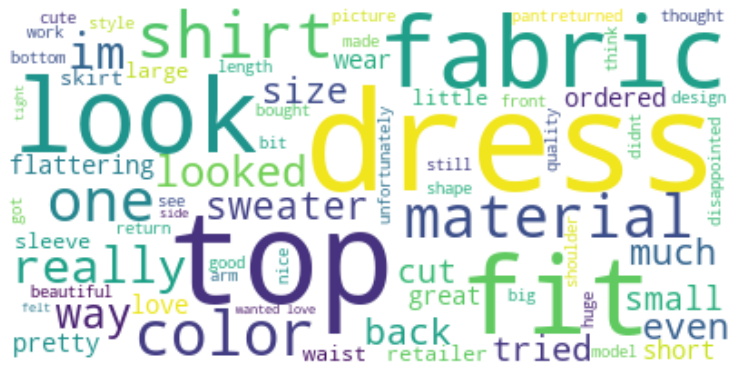

In [28]:
# WORDCLOUD FOR "NOT RECOMMENDED" CLASS
from wordcloud import WordCloud
worldcloud = WordCloud(background_color="white", max_words = 70)
worldcloud.generate(all_words_1) 
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

In [29]:
printFrequency(all_words_0)

comfortable - 2876
love - 8062
dress - 9249
pretty - 1761
store - 1749
im - 5046
would - 3704
ordered - 3013
petite - 2090
bought - 2684
length - 2312
little - 3410
true - 1519
wear - 5739
get - 1642
great - 5573
shirt - 2106
flattering - 3035
perfect - 3560
well - 2817
look - 5308
like - 5290
color - 5903
really - 3056
x - 1785
size - 8020
pant - 1753
skirt - 1887
top - 6583
nice - 2603
bit - 2567
sleeve - 1597
long - 2066
go - 1529
also - 1943
usually - 1694
run - 2264
retailer - 1724
make - 1736
fit - 8638
not - 7429
work - 2001
fabric - 3597
even - 1565
tried - 1613
quality - 1703
black - 1542
small - 3705
waist - 1860
got - 2124
material - 2065
large - 2259
think - 1858
good - 1551
jean - 2415
feel - 1775
medium - 1951
back - 2160
cute - 2495
much - 1982
one - 3051
sweater - 2204
beautiful - 2481
soft - 3030
short - 1862


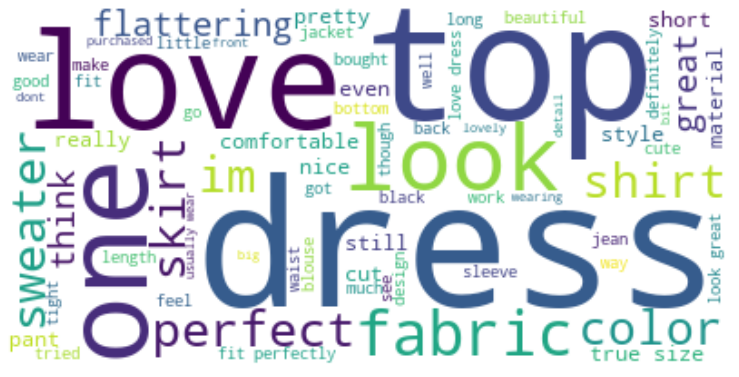

In [30]:
# WORDCLOUD FOR "RECOMMENDED" CLASS
from wordcloud import WordCloud
worldcloud = WordCloud(background_color="white", max_words = 70)
worldcloud.generate(all_words_0) 
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear",)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [31]:
df.head()

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im ...,0
2,high hope dress really wanted work initially o...,1
3,love love love jumpsuit fun flirty fabulous ev...,0
4,shirt flattering due adjustable front tie perf...,0


In [32]:
from sklearn.model_selection import train_test_split
X = df["review_text"]
y = df["recommended_ind"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [33]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18112,)
(4529,)
(18112,)
(4529,)


In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(preprocessor=cleaning_fsa, min_df=3) # max_features= 1500, max_df=1000, ngram_range=(1,2)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [35]:
pd.DataFrame(X_train_count.toarray(), columns = count_vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,abt,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,...,yesterday,yet,yikes,yo,yoga,yoke,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning_fsa, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [37]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,abt,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,...,yesterday,yet,yikes,yo,yoga,yoke,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.147316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.198746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ML MODELLING

In [38]:
from yellowbrick.classifier import PrecisionRecallCurve

In [39]:
##### MODEL EVALUATION FUNCTION
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [40]:
##### CREATE SCORING FOR CROSS VALIDATION 
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
scoring = {'accuracy': make_scorer(accuracy_score), 'precision-neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall-neg': make_scorer(recall_score, average=None, labels = [1]),
            'f1-neg': make_scorer(f1_score, average=None, labels = [1])}

## Logistic Regression

### CountVectorizer

In [41]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.1, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)

In [42]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3223  486]
 [ 138  682]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3709
           1       0.58      0.83      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.85      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.92      0.76      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



In [43]:
model = LogisticRegression(C = 0.1, max_iter=1000, class_weight='balanced')
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.865007
train_accuracy         0.897901
test_precision-neg     0.591083
train_precision-neg    0.653833
test_recall-neg        0.830547
train_recall-neg       0.927427
test_f1-neg            0.690559
train_f1-neg           0.766957
dtype: float64

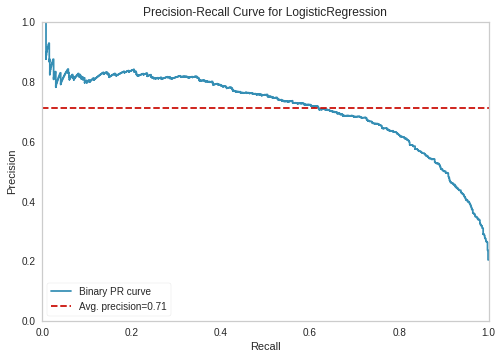

In [44]:
viz = PrecisionRecallCurve(LogisticRegression(C = 0.1, max_iter=1000, class_weight='balanced'), classes=log.classes_, per_class=True, cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [45]:
######
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
log_AP_neg = viz.score_

### TF-IDF

In [46]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.42, class_weight= 'balanced', max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.42, class_weight='balanced', max_iter=1000)

In [47]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3191  518]
 [ 122  698]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.57      0.85      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14831
           1       0.61      0.91      0.73      3281

    accuracy                           0.88     18112
   macro avg       0.80      0.89      0.83     18112
weighted avg       0.91      0.88      0.89     18112



In [48]:
model = LogisticRegression(C = 0.42, class_weight= 'balanced', max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.860922
train_accuracy         0.880583
test_precision-neg     0.578678
train_precision-neg    0.614255
test_recall-neg        0.857973
train_recall-neg       0.916116
test_f1-neg            0.691059
train_f1-neg           0.735412
dtype: float64

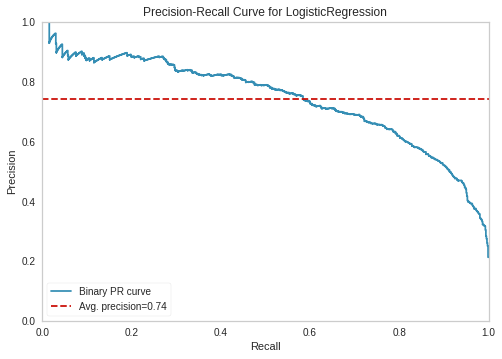

In [49]:
viz = PrecisionRecallCurve(LogisticRegression(C=0.4, max_iter=1000), classes=log.classes_, per_class=True, cmap="Set1")
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [50]:
######
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
log_tfidf_AP_neg = viz.score_

## Naive Bayes 

### Countvectorizer

In [51]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model
nb = MultinomialNB(alpha=10)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=10)

In [52]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3631   78]
 [ 534  286]]
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3709
           1       0.79      0.35      0.48       820

    accuracy                           0.86      4529
   macro avg       0.83      0.66      0.70      4529
weighted avg       0.86      0.86      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     14831
           1       0.84      0.40      0.54      3281

    accuracy                           0.88     18112
   macro avg       0.86      0.69      0.73     18112
weighted avg       0.87      0.88      0.86     18112



In [53]:
model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.863682
train_accuracy         0.873000
test_precision-neg     0.815529
train_precision-neg    0.856080
test_recall-neg        0.320330
train_recall-neg       0.359342
test_f1-neg            0.459755
train_f1-neg           0.506189
dtype: float64

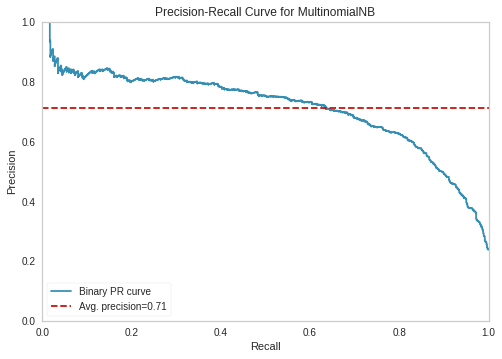

In [54]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(MultinomialNB(alpha=3), classes=nb.classes_, per_class=True, cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [55]:
#####
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
nb_AP_neg = viz.score_

### TF-IDF

In [56]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [57]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3688   21]
 [ 680  140]]
Test_Set
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3709
           1       0.87      0.17      0.29       820

    accuracy                           0.85      4529
   macro avg       0.86      0.58      0.60      4529
weighted avg       0.85      0.85      0.80      4529

Train_Set
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     14831
           1       0.94      0.24      0.38      3281

    accuracy                           0.86     18112
   macro avg       0.90      0.62      0.65     18112
weighted avg       0.87      0.86      0.82     18112



In [58]:
model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.846842
test_precision-neg    0.903685
test_recall-neg       0.173122
test_f1-neg           0.290000
dtype: float64

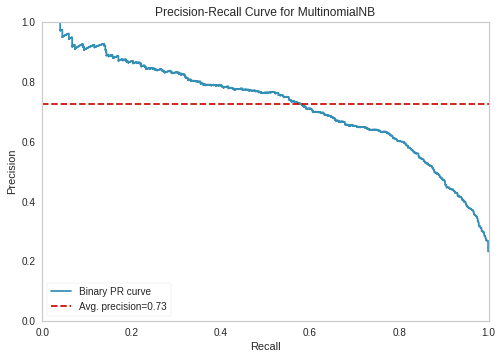

In [59]:
viz = PrecisionRecallCurve(MultinomialNB(), classes=nb.classes_, per_class=True, cmap="Set1")
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [60]:
#####
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
nb_tfidf_AP_neg = viz.score_

## Support Vector Machine (SVM)

### Countvectorizer

In [61]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01) # Linear i tercih ettik default yerine. Default biraz maliyetli idi
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [62]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3546  163]
 [ 347  473]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3709
           1       0.74      0.58      0.65       820

    accuracy                           0.89      4529
   macro avg       0.83      0.77      0.79      4529
weighted avg       0.88      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14831
           1       0.85      0.65      0.73      3281

    accuracy                           0.92     18112
   macro avg       0.89      0.81      0.84     18112
weighted avg       0.91      0.92      0.91     18112



In [63]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.887698
test_precision-neg    0.758668
test_recall-neg       0.558055
test_f1-neg           0.642794
dtype: float64

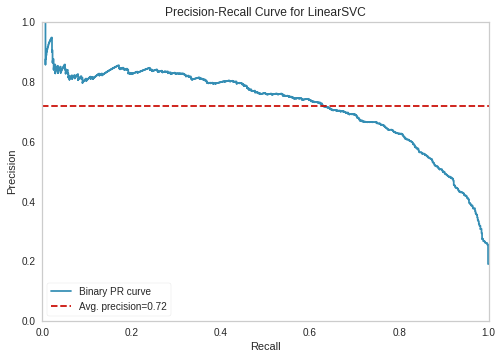

In [64]:
viz = PrecisionRecallCurve(LinearSVC(C=0.01), classes=svc.classes_, per_class=True, cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [65]:
#####
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
svc_AP_neg = viz.score_

### TD-IDF

In [66]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

In [67]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3583  126]
 [ 384  436]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3709
           1       0.78      0.53      0.63       820

    accuracy                           0.89      4529
   macro avg       0.84      0.75      0.78      4529
weighted avg       0.88      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14831
           1       0.86      0.61      0.72      3281

    accuracy                           0.91     18112
   macro avg       0.89      0.80      0.83     18112
weighted avg       0.91      0.91      0.91     18112



In [68]:
model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.888748
test_precision-neg    0.796295
test_recall-neg       0.519043
test_f1-neg           0.628079
dtype: float64

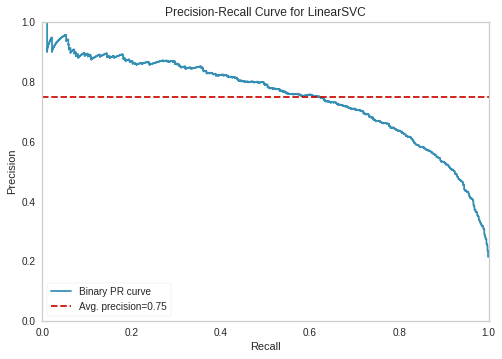

In [69]:
viz = PrecisionRecallCurve(LinearSVC(C=0.1), classes=svc.classes_, per_class=True, cmap="Set1")
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [70]:
#####
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
svc_tfidf_AP_neg = viz.score_

## Random Forest

### Countvectorizer

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 240, max_features = 17, n_estimators = 1,class_weight="balanced") # 
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=240, max_features=17,
                       n_estimators=1)

In [72]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3200  509]
 [ 550  270]]
Test_Set
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      3709
           1       0.35      0.33      0.34       820

    accuracy                           0.77      4529
   macro avg       0.60      0.60      0.60      4529
weighted avg       0.76      0.77      0.76      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14831
           1       0.78      0.76      0.77      3281

    accuracy                           0.92     18112
   macro avg       0.86      0.86      0.86     18112
weighted avg       0.92      0.92      0.92     18112



In [73]:
model = RandomForestClassifier(100, max_depth = 40, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.839333
test_precision-neg    0.916195
test_recall-neg       0.124963
test_f1-neg           0.219694
dtype: float64

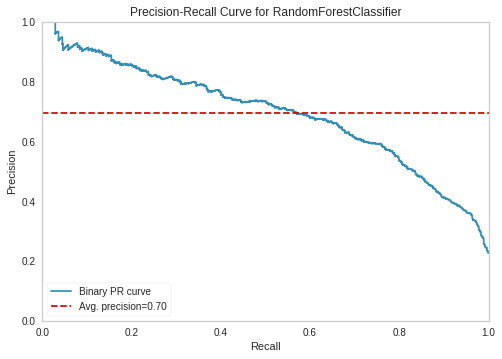

In [74]:
viz = PrecisionRecallCurve(RandomForestClassifier(100,max_depth = 40,n_jobs = -1), classes=rf.classes_, per_class=True,cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [75]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
rf_AP_neg = viz.score_

### TF-IDF

In [76]:
rf = RandomForestClassifier(max_depth= 240, max_features = 19, n_estimators = 1,class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=240, max_features=19,
                       n_estimators=1)

In [77]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3224  485]
 [ 537  283]]
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3709
           1       0.37      0.35      0.36       820

    accuracy                           0.77      4529
   macro avg       0.61      0.61      0.61      4529
weighted avg       0.77      0.77      0.77      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14831
           1       0.76      0.74      0.75      3281

    accuracy                           0.91     18112
   macro avg       0.85      0.85      0.85     18112
weighted avg       0.91      0.91      0.91     18112



In [78]:
model = RandomForestClassifier(max_depth= 240, max_features = 19, n_estimators = 1,class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.769987
test_precision-neg    0.365899
test_recall-neg       0.369693
test_f1-neg           0.367486
dtype: float64

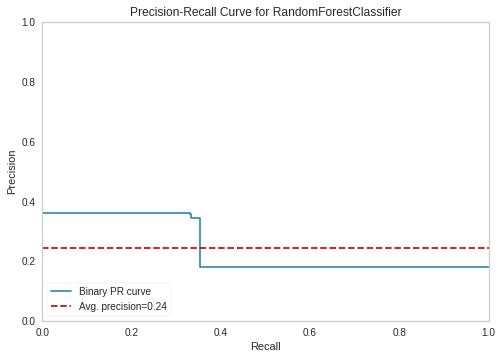

In [79]:
viz = PrecisionRecallCurve(RandomForestClassifier(max_depth= 240, max_features = 19, n_estimators = 1,class_weight="balanced", n_jobs = -1), classes=rf.classes_, per_class=True, cmap="Set1")
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [80]:
#####
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
rf_tfidf_AP_neg = viz.score_

## Ada Boosting

### Countvectorizer

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500)

In [82]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3482  227]
 [ 325  495]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3709
           1       0.69      0.60      0.64       820

    accuracy                           0.88      4529
   macro avg       0.80      0.77      0.78      4529
weighted avg       0.87      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     14831
           1       0.80      0.65      0.72      3281

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.83     18112
weighted avg       0.90      0.91      0.90     18112



In [83]:
model = AdaBoostClassifier(n_estimators= 500)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.878037
test_precision-neg    0.703759
test_recall-neg       0.565982
test_f1-neg           0.627062
dtype: float64

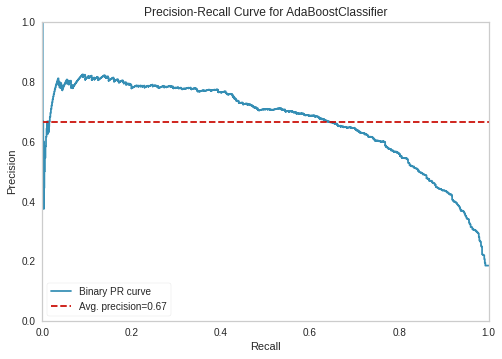

In [84]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators= 500), classes=ada.classes_, per_class=True, cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [85]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
ada_AP_neg = viz.score_

### TF-IDF

In [86]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500)

In [87]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3466  243]
 [ 341  479]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3709
           1       0.66      0.58      0.62       820

    accuracy                           0.87      4529
   macro avg       0.79      0.76      0.77      4529
weighted avg       0.87      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14831
           1       0.83      0.71      0.77      3281

    accuracy                           0.92     18112
   macro avg       0.89      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



In [88]:
model = AdaBoostClassifier(n_estimators= 500)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.875442
test_precision-neg    0.688639
test_recall-neg       0.571467
test_f1-neg           0.624120
dtype: float64

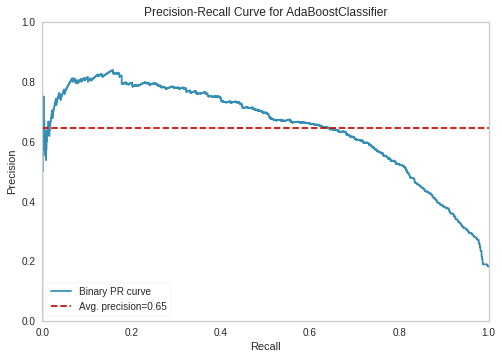

In [89]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators= 500), classes=ada.classes_, per_class=True, cmap="Set1")
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [90]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [1], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [1], average = None)
ada_tfidf_AP_neg = viz.score_

## DL modeling

In [91]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [92]:
df.head()

,review_text,recommended_ind
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im ...,0
2,high hope dress really wanted work initially o...,1
3,love love love jumpsuit fun flirty fabulous ev...,0
4,shirt flattering due adjustable front tie perf...,0


### Tokenization

In [93]:
X = df['review_text']
y = df['recommended_ind']

In [94]:
num_words = 12000
tokenizer = Tokenizer(num_words=num_words)

In [95]:
tokenizer.fit_on_texts(X)

### Creating word index

In [96]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'not': 3,
 'size': 4,
 'love': 5,
 'top': 6,
 'like': 7,
 'color': 8,
 'look': 9,
 'wear': 10,
 'great': 11,
 'im': 12,
 'would': 13,
 'fabric': 14,
 'small': 15,
 'really': 16,
 'ordered': 17,
 'little': 18,
 'perfect': 19,
 'one': 20,
 'flattering': 21,
 'soft': 22,
 'well': 23,
 'back': 24,
 'comfortable': 25,
 'cute': 26,
 'nice': 27,
 'bought': 28,
 'beautiful': 29,
 'bit': 30,
 'material': 31,
 'shirt': 32,
 'large': 33,
 'much': 34,
 'sweater': 35,
 'length': 36,
 'run': 37,
 'jean': 38,
 'also': 39,
 'work': 40,
 'petite': 41,
 'got': 42,
 'long': 43,
 'short': 44,
 'waist': 45,
 'quality': 46,
 'medium': 47,
 'skirt': 48,
 'think': 49,
 'pretty': 50,
 'even': 51,
 'retailer': 52,
 'x': 53,
 'make': 54,
 'feel': 55,
 'tried': 56,
 'pant': 57,
 'store': 58,
 'usually': 59,
 'get': 60,
 'way': 61,
 'sleeve': 62,
 'good': 63,
 'could': 64,
 'big': 65,
 'made': 66,
 'cut': 67,
 'go': 68,
 'dont': 69,
 'didnt': 70,
 'still': 71,
 'style': 72,
 'right': 73,
 

In [97]:
len(tokenizer.word_index)

11998

### Converting tokens to numeric

In [98]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [99]:
X[100]

'fabric felt cheap didnt find flattering top reference wearing medium photo measurement'

In [100]:
print(X_num_tokens[100])

[14, 186, 369, 70, 152, 21, 6, 238, 81, 47, 134, 1110]


### Maximum number of tokens for all documents¶

In [101]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [102]:
num_tokens

array([ 5, 30, 48, ..., 19, 39, 11])

In [103]:
num_tokens.max()

59

In [104]:
max_tokens = 50

In [105]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9619716443619981

### Fixing token counts of all documents (pad_sequences)

In [106]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [107]:
X_pad.shape

(22641, 50)

### Train Set Split

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y)

### Modeling

In [110]:
model = Sequential() 

In [111]:
embedding_size = 100

In [112]:
model.add(Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_tokens)) 
model.add(Dropout(0.2))
model.add(GRU(units=96, return_sequences=True)) 
model.add(GRU(units=48, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=24))
model.add(Dense(1, activation='sigmoid'))

In [113]:
optimizer = Adam(learning_rate=0.008) 

In [114]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

In [115]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1200000   
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 gru (GRU)                   (None, 50, 96)            57024     
                                                                 
 gru_1 (GRU)                 (None, 50, 48)            21024     
                                                                 
 dropout_1 (Dropout)         (None, 50, 48)            0         
                                                                 
 gru_2 (GRU)                 (None, 24)                5328      
                                                                 
 dense (Dense)               (None, 1)                 2

In [116]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience = 1, restore_best_weights=True)

In [117]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61061291, 2.76013411])

In [118]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
71/71 [==============================] - 12s 34ms/step - loss: 0.4581 - recall: 0.7991 - val_loss: 0.3928 - val_recall: 0.8890
Epoch 2/10
71/71 [==============================] - 1s 15ms/step - loss: 0.2705 - recall: 0.9107 - val_loss: 0.3063 - val_recall: 0.8220
Epoch 2: early stopping


### Model evaluation

In [119]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.458128,0.799147,0.392814,0.889024
1,0.270467,0.910698,0.306336,0.821951


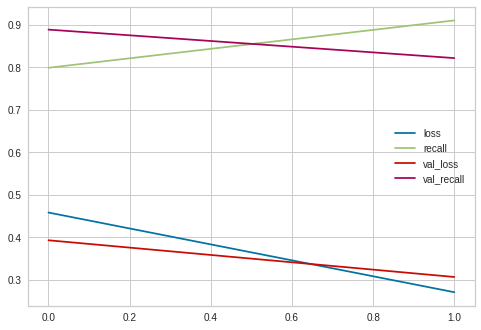

In [120]:
model_loss.plot()

In [121]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 1s 6ms/step - loss: 0.3928 - recall: 0.8890


[0.39281412959098816, 0.8890243768692017]

In [122]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 3s 6ms/step - loss: 0.3367 - recall: 0.9503


[0.33666667342185974, 0.9503200054168701]

In [123]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
y_pred = model.predict(X_test) >= 0.5
print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 2s 4ms/step
[[3023  686]
 [  91  729]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3709
           1       0.52      0.89      0.65       820

    accuracy                           0.83      4529
   macro avg       0.74      0.85      0.77      4529
weighted avg       0.89      0.83      0.84      4529



In [124]:
y_train_pred = model.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 2s 4ms/step
[[12364  2467]
 [  163  3118]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14831
           1       0.56      0.95      0.70      3281

    accuracy                           0.85     18112
   macro avg       0.77      0.89      0.80     18112
weighted avg       0.91      0.85      0.87     18112



142/142 [==============================] - 1s 5ms/step


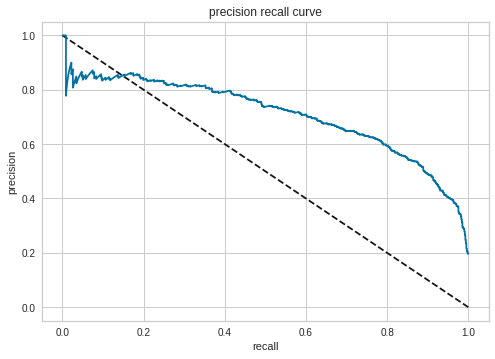

In [125]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
y_pred_proba = model.predict(X_test) # Burada dönen skor 1 label ının probasıdır.(1 sınıfına ait olma olasılıklarını döndürür)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [126]:
average_precision_score(y_test, y_pred_proba)

0.7089560895919756

## BERT Modeling

In [1]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [2]:
strategy = tf.distribute.TPUStrategy(resolver) 

### Tokenization

In [6]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.2 MB/s 
     |████████████████████████████████| 163 kB 62.4 MB/s 
     |████████████████████████████████| 7.6 MB 65.1 MB/s 


In [7]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [26]:
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")

In [29]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [31]:
df.dropna(inplace=True)

In [32]:
X = df["Review Text"]
y = df["Recommended IND"]

In [33]:
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True) # add_special_tokens=True: CLS[2] , SEP[3]
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Max sentence length:  162


In [40]:
sum(np.array(max_token) < 130) / len(max_token)

0.9529549384599736

### Train test split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

### Transformation text to tensor

In [42]:
def transformation(X):
  # set array dimensions
  seq_len = 130
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [43]:
Xids_train, Xmask_train = transformation(X_train) 
Xids_test, Xmask_test = transformation(X_test)

In [44]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (17695, 130)
Xmask_train.shape : (17695, 130)
Xids_test.shape   : (1967, 130)
Xmask_test.shape  : (1967, 130)


In [45]:
labels_train = y_train.values.reshape(-1,1) 
labels_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [46]:
labels_test = y_test.values.reshape(-1,1)
labels_test

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [47]:
import tensorflow as tf
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(130,), dtype=tf.float64, name=None), TensorSpec(shape=(130,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [48]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(130,), dtype=tf.float64, name=None), TensorSpec(shape=(130,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [49]:
def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [50]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [51]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(130,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(130,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [52]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(130,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(130,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [53]:
batch_size = 32 # 16, 32

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


length = len(X_train)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size) 

### Creating Model

In [59]:
def create_model():
    from transformers import TFAutoModel  # AutoModel başına TF yazabiliyoruz. Notebook u dışardan göre biri Tensorflow un Tensorlarını mı kullanmış bilsin diye başına TF yazdık
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(130,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(130,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(130, activation='relu')(embeddings)  # dense layer a word_embedding bilgilerini aktar. Aktaracağım layer ı da tuple içinde ("embeddings") yazıyorum.(functional API tarzı(Önceden sequential tarzı ile yazıyorduk))
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1 # x deki bilgileri dropout a aktardık
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x) # Üstteki x bilgileri de buraya aktardık. Her bir token hangi tokenlerle kullanılmış bu kısımda görüyor. Eğer son bir revize yapılacaksa bu kısımda yapılıyor

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [60]:
with strategy.scope():
  optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [62]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 130)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 130)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 130,                                         

In [63]:
history = model3.fit(
    train_ds2, validation_data= val_ds, class_weight= {0:1, 1:4},
    epochs=1)

553/553 [==============================] - 157s 122ms/step - loss: 0.4308 - recall_2: 0.9889 - val_loss: 0.3053 - val_recall_2: 0.9944


### Model evaluation

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model3.predict(val_ds) >= 0.5
print(classification_report(y_test, y_pred))

62/62 [==============================] - 17s 179ms/step
              precision    recall  f1-score   support

           0       0.94      0.38      0.54       358
           1       0.88      0.99      0.93      1609

    accuracy                           0.88      1967
   macro avg       0.91      0.69      0.74      1967
weighted avg       0.89      0.88      0.86      1967



In [65]:
y_train_pred = model3.predict(train_ds) >= 0.5
print(classification_report(y_train, y_train_pred)) 

553/553 [==============================] - 16s 27ms/step
              precision    recall  f1-score   support

           0       0.96      0.45      0.61      3217
           1       0.89      1.00      0.94     14478

    accuracy                           0.90     17695
   macro avg       0.93      0.72      0.78     17695
weighted avg       0.90      0.90      0.88     17695



62/62 [==============================] - 3s 28ms/step


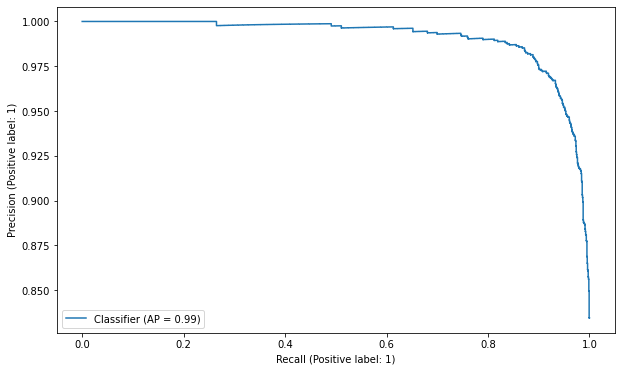

In [67]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],
                        
                        "F1_Score_Negative": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0],
                                             rf_count_f1_neg[0], ada_count_f1_neg[0], nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0],
                                             svc_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0]],
                        
                        "Recall_Score_Negative": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0], 
                                                  rf_count_rec_neg[0], ada_count_rec_neg[0], 
                                                  nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0], 
                                                 rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0]],
                        
                        "Precision_Recall_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg, rf_AP_neg,
                                                          ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
                                                           rf_tfidf_AP_neg, ada_tfidf_AP_neg]})

compare

In [ ]:
def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Precision_Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Precision_Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___